# Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
So interpretation is important!
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data
CarPrice_Assignment.csv : Contains all the relevent specification about the cars in the US market and their pricing .

## Steps to Build the Linear regression model

## Step 1 : Data Cleaning & EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/My Drive/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# missing values in each column
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Dropping Duplicates if any
df = df.drop_duplicates()

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# we can drop the car_ID variable which is not relevent for the price modeling
df.drop('car_ID' ,1,inplace = True)

In [ ]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [ ]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        sns.kdeplot(x = var , weights = 'price' , data = df)
    plt.show()

In [ ]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

### Data Analysis

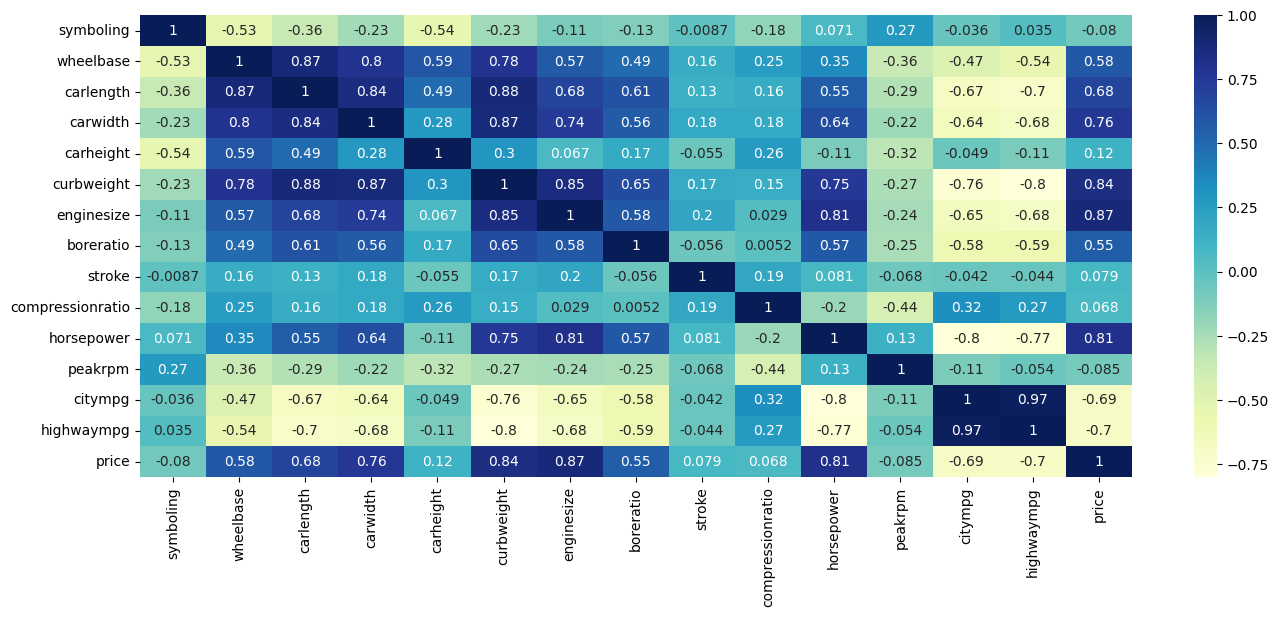

In [ ]:
plt.figure(figsize = (16, 6))
cor=df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

**We can spot some features which has some kind of positive relationships going on with the dependent price variable like,**

1.   wheelbase,
2.   carlength,
3.   carwidth,
4.   curbweight,
5.   enginesize,
6.   boreratio,
7.   horsepower.

**there are also a few variables showing a negative relationship with price variable like,**

1.   citympg,
2.   highwaympg







Let's also have a look at the categorical variables we have in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

**Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable.
Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
Let's make the category clear by classifying based on risk**

*   -ve symboling as safe
*   0, 1 as moderate
*   2,3 as risky
   


In [ ]:
df['symboling'] = df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})
df['symboling'].value_counts()

moderate    121
risky        59
safe         25
Name: symboling, dtype: int64

In [ ]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

**The categorical variable CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. So lets remove car model from the Car name column**

In [ ]:
df['car_company'] = df['CarName'].apply(lambda x: x.split( )[0])
df.drop('CarName',axis=1,inplace=True)

In [ ]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [ ]:
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

we observe that there are multiple company name being misspelled. lets correct this in the data.

In [ ]:
# Correcting the misspelled company names.
df['car_company'].replace('maxda','mazda',inplace=True)
df['car_company'].replace('Nissan','nissan',inplace=True)
df['car_company'].replace('porcshce','porsche',inplace=True)
df['car_company'].replace('toyouta','toyota',inplace=True)
df['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [ ]:
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
cat_var = list(df.select_dtypes(['object']).columns)
cat_var

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

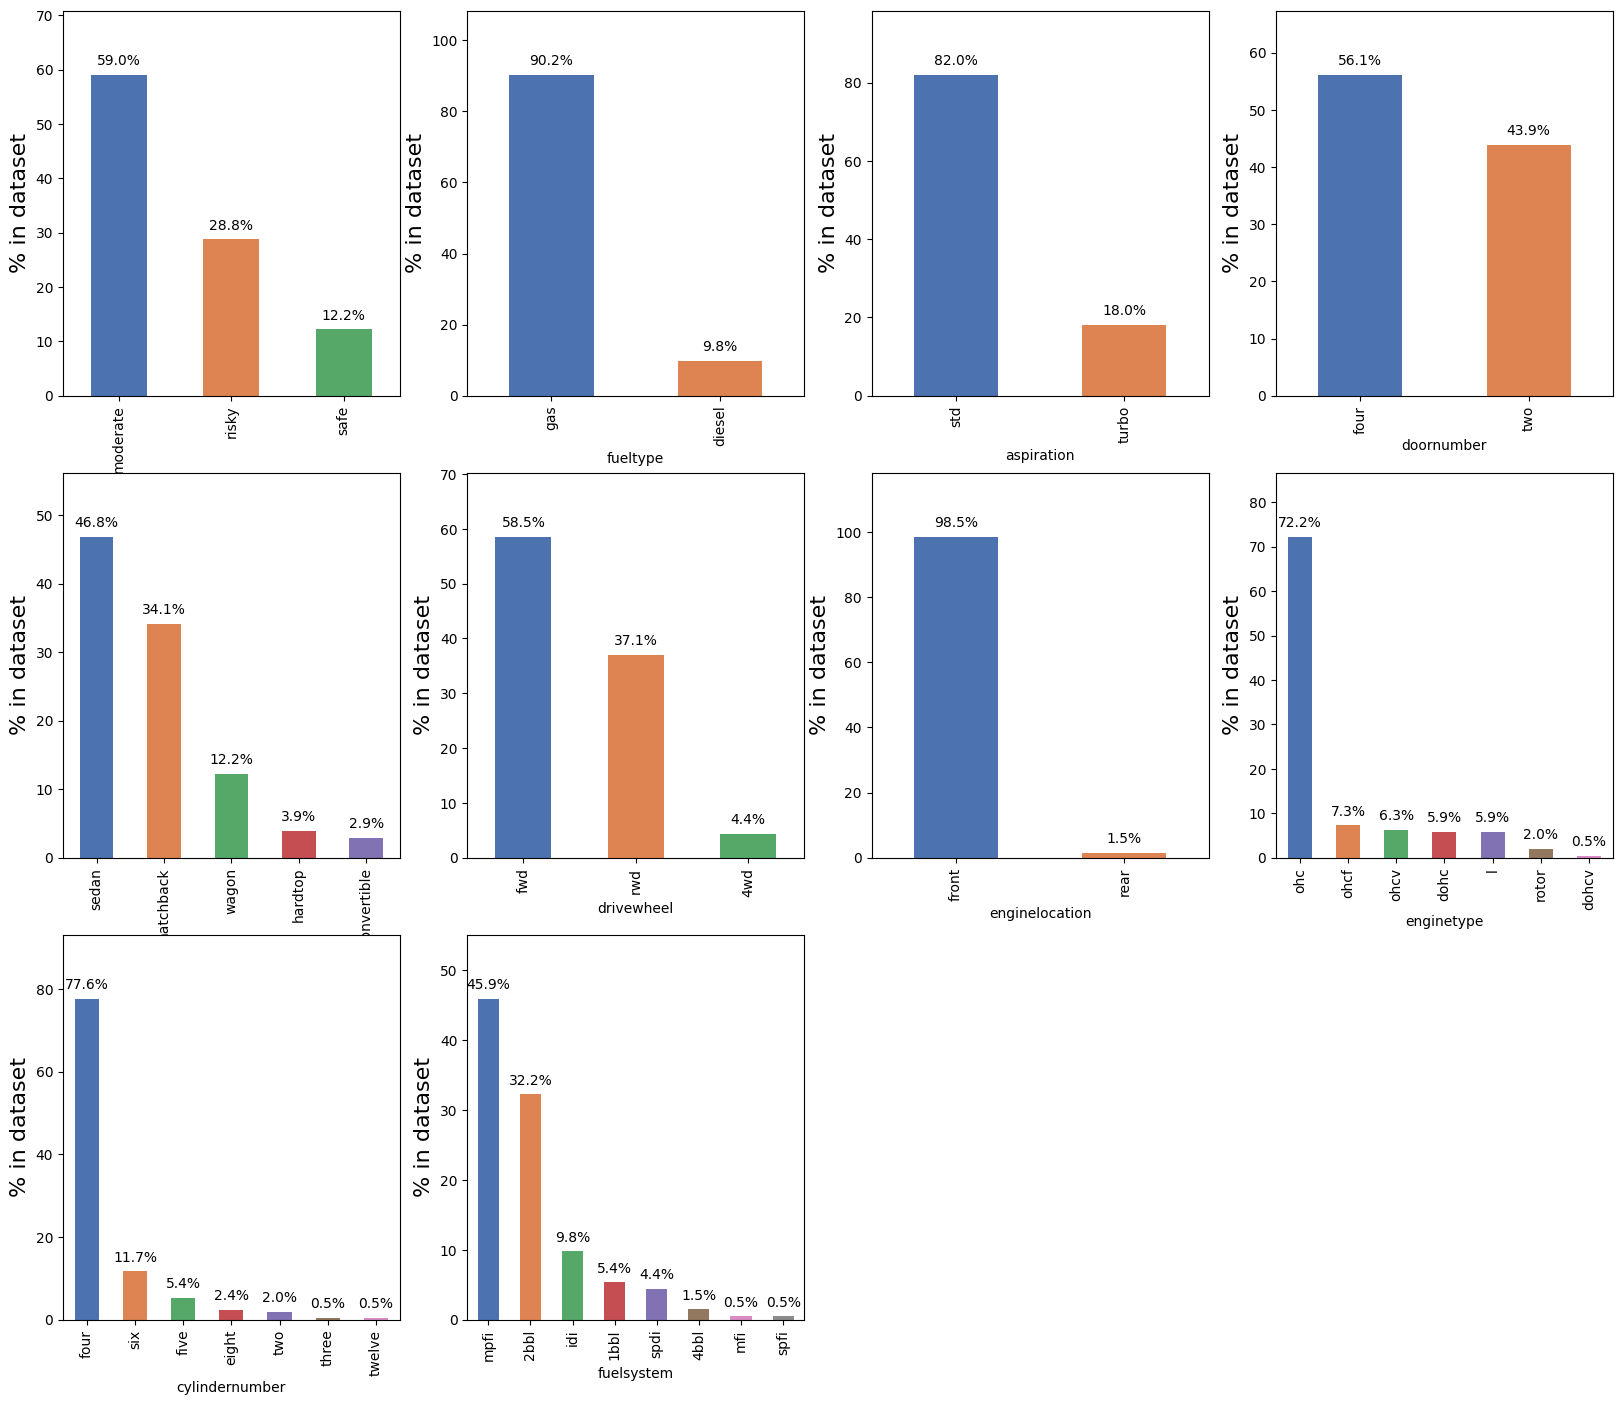

In [ ]:
# market percentage of car's with respect to features
plot_percentages(df,cat_var[:-1])

As we can see in the above bar chart, Cars based on some features & specification can be widely sold in US market. To summarize we can get insights & facts as below accordig to the Car specifications :
1.  symboling: **moderate (0,1)**
2.  Carbody: **Sedan**
3.  fueltype: **gas**
4.  aspiration: **standard**
5.  doornumbers: **four**
6.  drivewheel: **forward**
7.  engine location: **front**
8.  engine type: **ohc**
9.  cylinderNumber: **four**
10. fuelSystem: **mpfi**


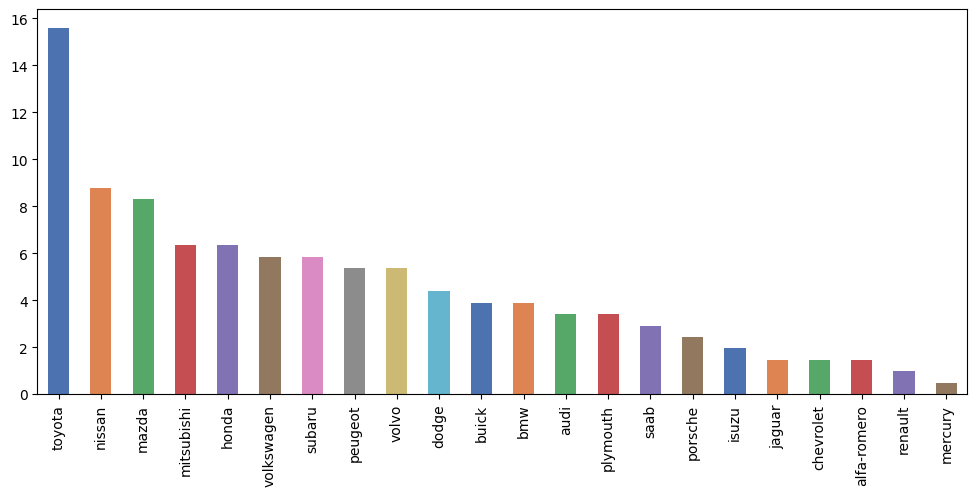

In [ ]:
plt.figure(figsize = [12,5])
(df.car_company.value_counts(normalize = True)*100).plot.bar(color=sns.color_palette('deep', 16))
plt.show()

### Toyota car company is high in demand with almost 16 % cars in US market, followed by Nissan & Mazda at more than 8 % of US market

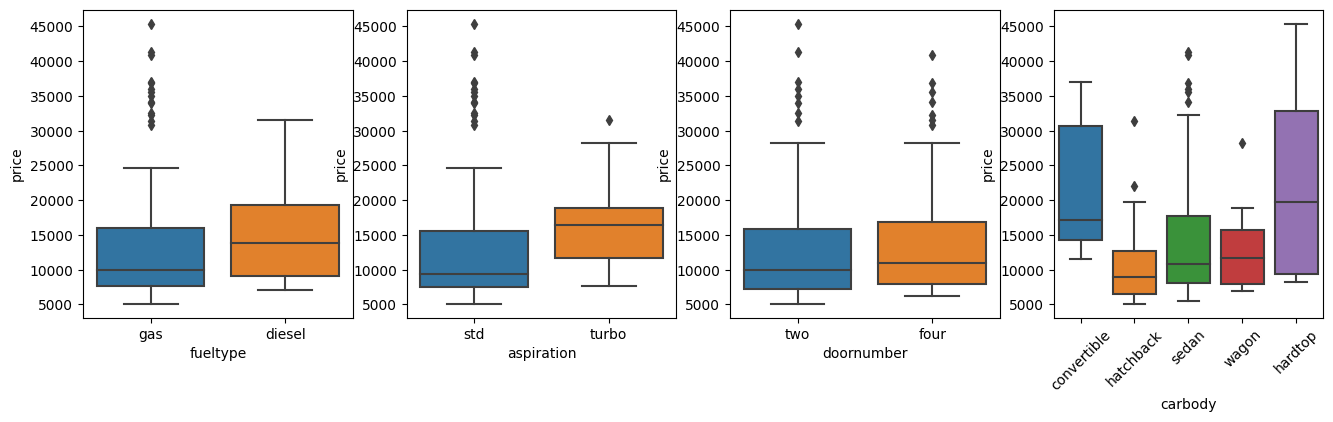

In [ ]:
plt.figure(figsize=[16,4])
plt.subplot(1,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(1,4,3)
sns.boxplot(x = 'doornumber', y =  'price', data = df)
plt.subplot(1,4,4)
sns.boxplot(x =  'carbody', y =  'price', data = df)
plt.xticks(rotation = 45)
plt.show()

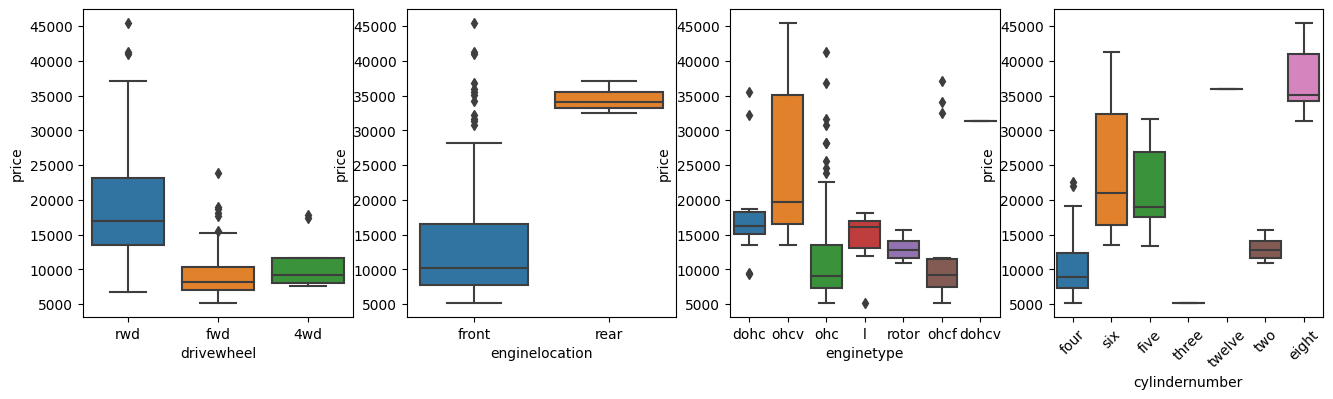

In [ ]:
plt.figure(figsize=[16,4])
plt.subplot(1,4,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(1,4,3)
sns.boxplot(x =  'enginetype', y =  'price', data = df)
plt.subplot(1,4,4)
sns.boxplot(x =   'cylindernumber', y =  'price', data = df)
plt.xticks(rotation = 45)
plt.show()

### From the above boxplots we can derive following insights :
*  The price of real wheel drive is significantly higher that other drivewheel options.
*  cylindernumber and engine type also seem to regulate the price of cars.
*  hardtop and convertables cars are definatly priced higher than other body types available. Tells us that variable carbody is contributing in determinig the price.
*  enginelocation and aspiration surly has a visible affect on the pricing of the car


<Axes: xlabel='car_company', ylabel='price'>

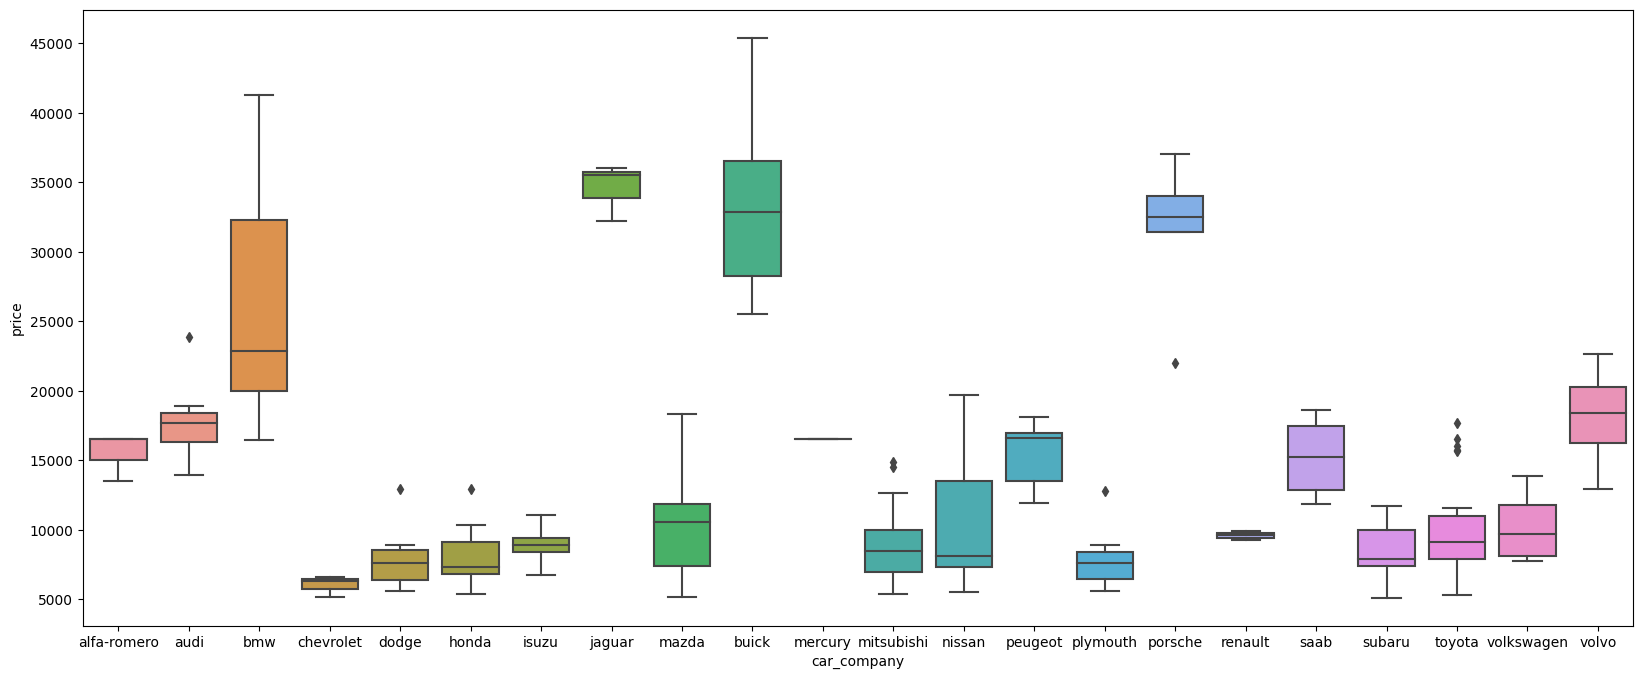

In [ ]:
plt.figure(figsize = [20,8])
sns.boxplot(x =  'car_company', y = 'price', data = df)

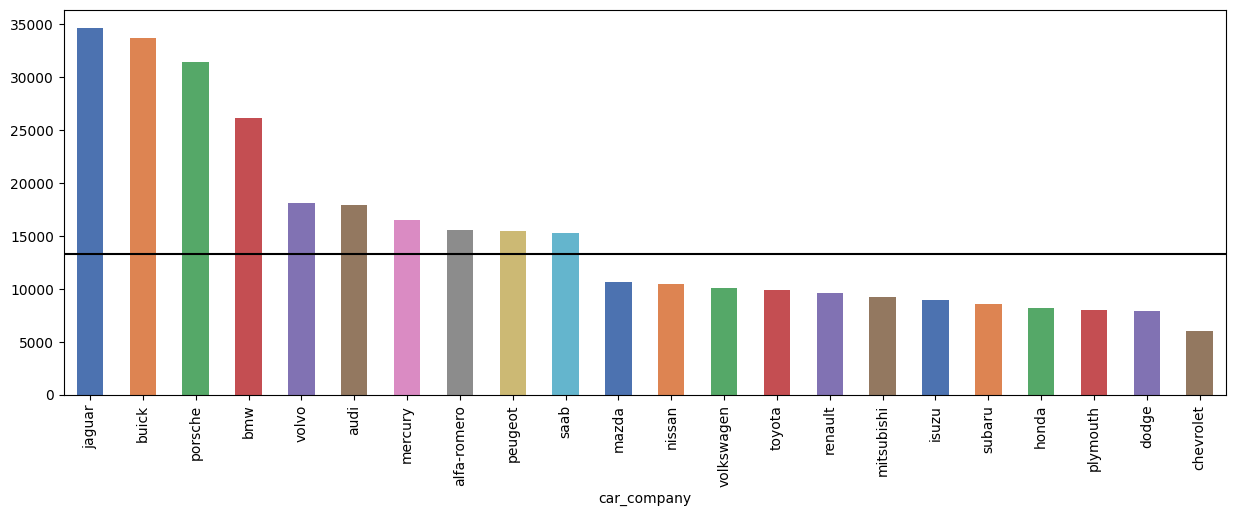

In [ ]:
plt.figure(figsize = [15,5])
df.groupby('car_company').price.mean().sort_values(ascending=False).plot.bar(color=sns.color_palette('deep', 16))
plt.axhline(y=np.nanmean(df.price),color = 'black')

**Cars manufacturers like Jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.**

In [ ]:
df.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

**We will segment the car companies based on the mean company price as**
*  **lowtier** : if company mean price is below 10,000
*  **midtier** : if company mean price is above 10,000 and below 20,000
*  **hightier** : if company mean price is above 20,000

In [ ]:
median_dict = df.groupby(['car_company'])[['price']].median().to_dict()
median_dict = median_dict['price']
median_dict

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [ ]:
dict_keys = list(median_dict.keys())

# Median price of category below 10000 is low, between 10000 and 20000 is med and above 20000 is high
for i in dict_keys:
    if median_dict[i] < 10000:
        median_dict[i] = 'low'
    elif median_dict[i] >= 10000 and median_dict[i] <= 20000:
        median_dict[i] = 'med'
    else:
        median_dict[i] = 'high'

median_dict

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [ ]:
df.car_company = df.car_company.map(median_dict)
df.car_company.unique()

array(['med', 'high', 'low'], dtype=object)

In [ ]:
df.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
high    30788.687500
med     14812.967268
low      9226.168000
Name: price, dtype: float64

*  **ohc hasbeen mis-spelled at places with ohcv**
*  **dohc has been mis-spelled as dohcv**
*  **mpfi has been mis-spelled as mfi**

In [ ]:
df['fuelsystem'].replace('mfi','mpfi',inplace=True)
df['enginetype'].replace('dohcv','dohc',inplace = True)
df['enginetype'].replace('ohcv','ohc',inplace = True)

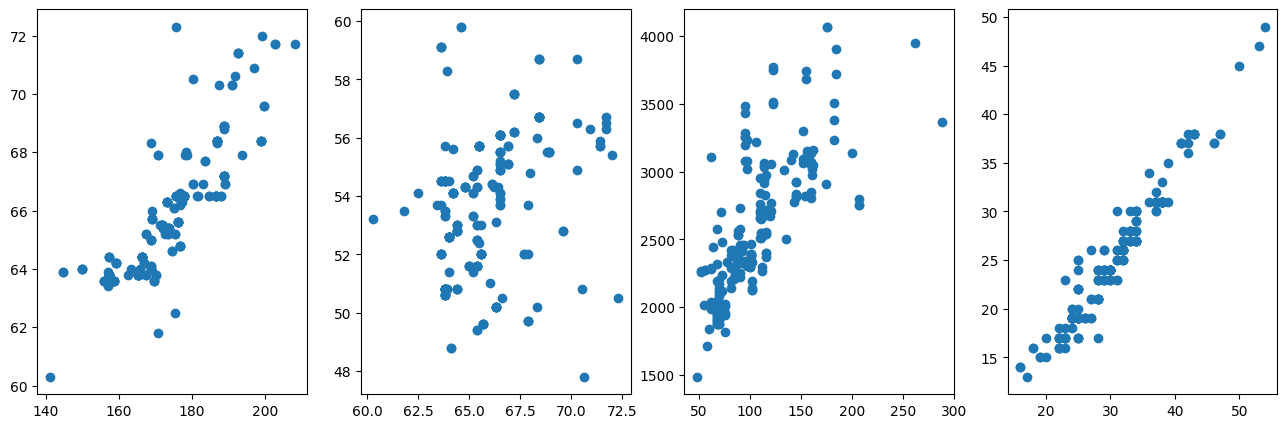

In [ ]:
plt.figure(figsize = [16,5])
plt.subplot(1,4,1)
plt.scatter(data = df , x = 'carlength', y = 'carwidth')
plt.subplot(1,4,2)
plt.scatter(data = df , x = 'carwidth', y = 'carheight')
plt.subplot(1,4,3)
plt.scatter(data = df , x = 'horsepower', y = 'curbweight')
plt.subplot(1,4,4)
plt.scatter(data = df , x = 'highwaympg', y = 'citympg')
plt.show()


## Step 2 : Data Encoding

From the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [ ]:
# Creating new variable carLWratio
df['carLWratio'] = df.carlength/df.carwidth
# Creating new variable carWHratio
df['carWHratio'] = df.carwidth/df.carheight
# Creating new variable PWratio
df['PWratio'] = df.horsepower/df.curbweight
# Creating new variable HCmpgratio
df['HCmpgratio'] = df.highwaympg/df.citympg
## droping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

## Handeling Categorical Variable for Linear Regression

In [ ]:
# Converting categorical variables with two levels to either 1 or 0
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,car_company,carLWratio,carWHratio,PWratio,HCmpgratio
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,med,2.633385,1.313525,0.043564,1.285714
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,med,2.633385,1.313525,0.043564,1.285714
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohc,...,3.47,9.0,154,5000,16500.0,med,2.613740,1.250000,0.054552,1.368421
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,med,2.667674,1.219153,0.043646,1.250000
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,med,2.659639,1.222836,0.040722,1.222222


## Dummy variables

In [ ]:
df = pd.get_dummies(df , drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype               205 non-null    int64  
 1   aspiration             205 non-null    int64  
 2   doornumber             205 non-null    int64  
 3   enginelocation         205 non-null    int64  
 4   wheelbase              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  price                  205 non-null    float64
 13  carLWratio             205 non-null    float64
 14  carWHratio             205 non-null    float64
 15  PWrati

In [ ]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_risky', 'symboling_safe', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_company_low', 'car_company_med'],
      dtype='object')

In [ ]:
df.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_low,car_company_med
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,0.439024,0.985366,98.756585,2555.565854,126.907317,3.329756,3.255415,10.142537,...,0.004878,0.019512,0.321951,0.014634,0.097561,0.463415,0.043902,0.004878,0.609756,0.273171
std,0.297446,0.385535,0.497483,0.120377,6.021776,520.680204,41.642693,0.270844,0.313597,3.972040,...,0.069843,0.138655,0.468368,0.120377,0.297446,0.499880,0.205380,0.069843,0.488999,0.446679
min,0.000000,0.000000,0.000000,0.000000,86.600000,1488.000000,61.000000,2.540000,2.070000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,94.500000,2145.000000,97.000000,3.150000,3.110000,8.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,97.000000,2414.000000,120.000000,3.310000,3.290000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,102.400000,2935.000000,141.000000,3.580000,3.410000,9.400000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,120.900000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype               205 non-null    int64  
 1   aspiration             205 non-null    int64  
 2   doornumber             205 non-null    int64  
 3   enginelocation         205 non-null    int64  
 4   wheelbase              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  price                  205 non-null    float64
 13  carLWratio             205 non-null    float64
 14  carWHratio             205 non-null    float64
 15  PWrati

### As we can see, we have now converted all variables in numeric data type so we can interpret it & make it useful in our linear regression model making

## Step 3 : Test - Train Data split

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Rescalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()


In [ ]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_low,car_company_med
122,1,1,0,1,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,1,0
125,1,1,1,1,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,1,0,0,0,0
166,1,1,1,1,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,1,0,0,1,0
1,1,1,1,1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,1,0,0,0,1
199,1,0,0,1,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_low,car_company_med
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.006993,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958,0.0,0.615385,0.265734
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.083624,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198,0.0,0.488214,0.443276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


**Dividing into X and Y sets for the model building**

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

## Step 4 : Building Linear Regression Model

We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

**Aprroach 1 : RFE (Recursive feature elimination)**

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 10)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 22),
 ('aspiration', False, 18),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 9),
 ('enginesize', False, 11),
 ('boreratio', False, 5),
 ('stroke', False, 17),
 ('compressionratio', False, 23),
 ('horsepower', True, 1),
 ('peakrpm', False, 16),
 ('carLWratio', False, 30),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 25),
 ('symboling_risky', False, 29),
 ('symboling_safe', False, 24),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', False, 2),
 ('drivewheel_fwd', False, 27),
 ('drivewheel_rwd', False, 32),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 8),
 ('enginetype_ohcf', False, 7),
 ('enginetype_rotor', False, 10),
 ('cylindernumber_five', False, 13),
 ('cylindernumber_four', False, 12),
 ('cylindernumber_six', False, 14),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('c

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'horsepower', 'carWHratio', 'PWratio',
       'carbody_hatchback', 'cylindernumber_three', 'cylindernumber_twelve',
       'car_company_low', 'car_company_med'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'carLWratio',
       'HCmpgratio', 'symboling_risky', 'symboling_safe', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

**Approach 2 : Manual Feature elimation using Statsmodel**

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.3
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           5.32e-72
Time:                        16:16:21   Log-Likelihood:                 209.31
No. Observations:                 143   AIC:                            -396.6
Df Residuals:                     132   BIC:                            -364.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.54

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,217.25
3,horsepower,16.65
5,PWratio,12.19
9,car_company_low,4.62
2,wheelbase,3.65
10,car_company_med,3.28
4,carWHratio,2.20
6,carbody_hatchback,1.46
1,enginelocation,1.30
8,cylindernumber_twelve,1.29


In [ ]:
X_train_new = X_train_rfe.drop(["cylindernumber_three",'PWratio'], axis = 1)

In [ ]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     181.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           4.84e-68
Time:                        16:16:38   Log-Likelihood:                 193.72
No. Observations:                 143   AIC:                            -369.4
Df Residuals:                     134   BIC:                            -342.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,171.75
7,car_company_low,4.35
8,car_company_med,3.14
3,horsepower,2.66
4,carWHratio,2.13
2,wheelbase,1.92
5,carbody_hatchback,1.39
1,enginelocation,1.25
6,cylindernumber_twelve,1.21


In [ ]:
X_train_new = X_train_new.drop(['cylindernumber_twelve'], axis = 1)
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     207.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           6.32e-69
Time:                        16:17:24   Log-Likelihood:                 193.01
No. Observations:                 143   AIC:                            -370.0
Df Residuals:                     135   BIC:                            -346.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3909      0.07

In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,168.85
6,car_company_low,4.34
7,car_company_med,3.12
3,horsepower,2.60
4,carWHratio,2.07
2,wheelbase,1.90
5,carbody_hatchback,1.36
1,enginelocation,1.23


In [ ]:
X_train_new.columns

Index(['enginelocation', 'wheelbase', 'horsepower', 'carWHratio',
       'carbody_hatchback', 'car_company_low', 'car_company_med'],
      dtype='object')

## Step 5 : Residual Analysis of the trained data

In [ ]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

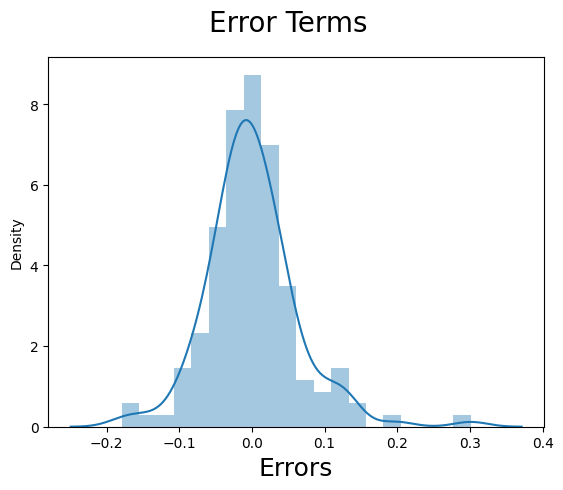

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

In [ ]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

## Step 6 : Model Prediction

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 6 : Model Evaluation

Text(0, 0.5, 'y_pred')

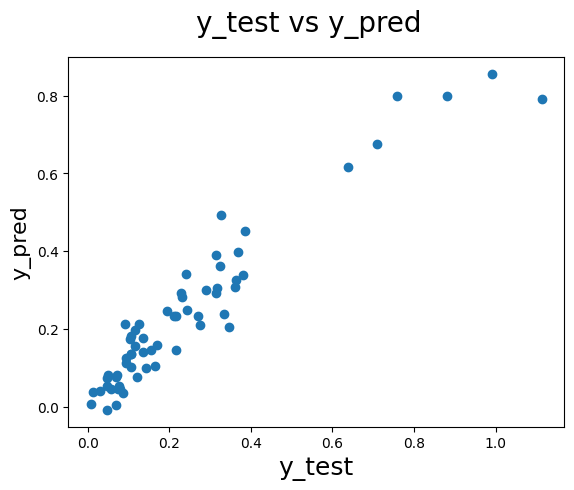

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.0704478412930997
Model r2_score: 0.9071457017562676


#### r2_score on the test data is very close to the trained Adj. R-Squared value of the model which was 0.91. we have a significantly high r2_score and a low RMSE of 0.07.
#### so we can say that Overall we have a decent model, but we also acknowledge that we could do better.

We can see that the equation of our best fitted line is:

$ price = 0.255  \times  wheelbase + 0.479 \times  horsepower + 0.143 \times carWHratio - 0.175 \times enginelocation - 0.036 \times hatchback carbody - 0.309 \times low valued car - 0.0682 \times medium valued car $

We have a couple of options:
1. Add new features (ground_area= carlength * carwidth, etc.)
2. choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower.
3. Build a non-linear model